<a href="https://colab.research.google.com/github/ob3dd/Adult-Income-and-Wine-Quality-/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Imports**

In [18]:
# Import Panda
import pandas as pd
# Import Numpy
import numpy as np
# Import Matplotlib
import matplotlib.pyplot as plt
# Import Seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##**Load Data**

In [19]:
fpath = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/wines_SPA.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


##**Clean the Data**

###**Dropping Unnecessary Columns**

In [20]:
# Drop columns
columns_to_drop = ('country')
df.drop(columns_to_drop, axis=1, inplace=True)

This column isn't relevant to our data, so it will be dropped.

###**Removing Duplicates**

In [21]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 5452 duplicates in the dataset


In [22]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [23]:
# Check for dulplicates
df.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


###**Handling Missing Values**

In [24]:
# Checking for missing values
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

The missing values will be taken care of using the SimpleImputer in the latter stages of our processing.

In [25]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values in total.')

There are 650 missing values in total.


## **Fixing Inconsistencies**

In [26]:
# Viewing all data types
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object')

In [27]:
# creating a for loop that loops through my string column
for col in str_cols:
  print(f"- Column = {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column = winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



- Column = wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero         

In [28]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [29]:
# checking for inconsistent categorical features
df.describe(exclude= 'number')

,winery,wine,year,region,type
count,2048,2048,2046,2048,1942
unique,480,847,71,76,21
top,Vega Sicilia,Tinto,2016,Ribera del Duero,Ribera Del Duero Red
freq,97,56,243,541,535


##**Visualizations**

###**Using Univariate Exploratory Visualizations for all features**

###**Catergorical Columns**

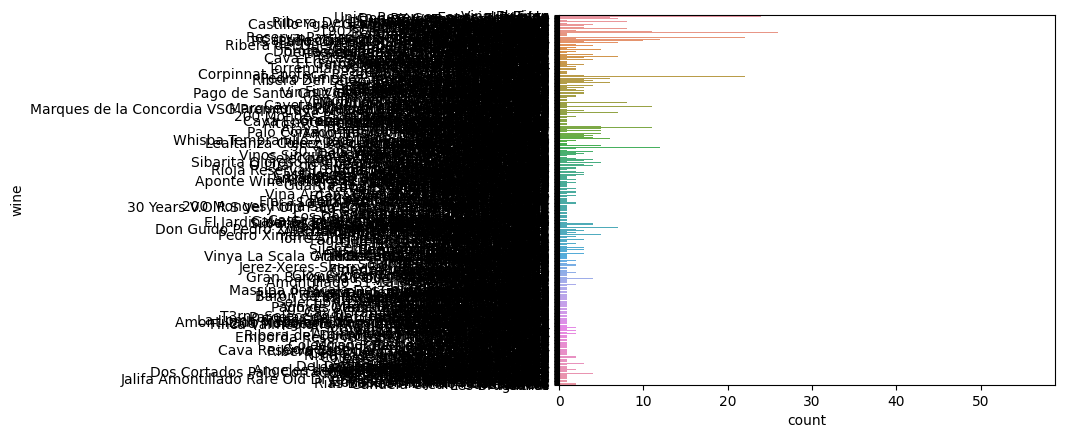

In [38]:
sns.countplot(data = df, y = 'wine');

This looks this way because there is too much information to breakdown.

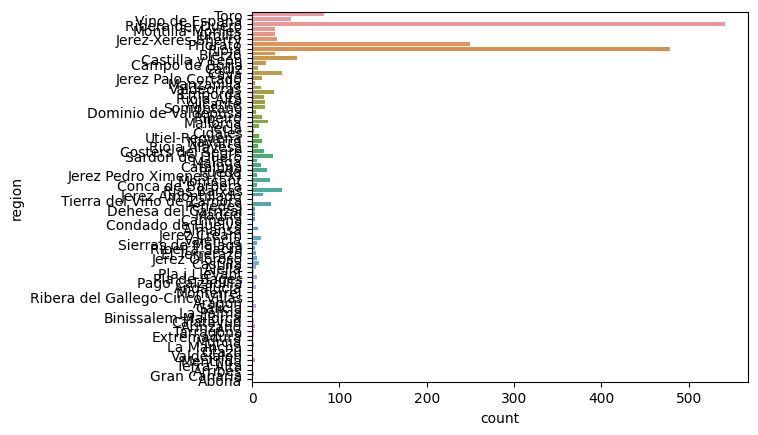

In [35]:
sns.countplot(data = df, y = 'region');

Rioja was the region with the most wine productions

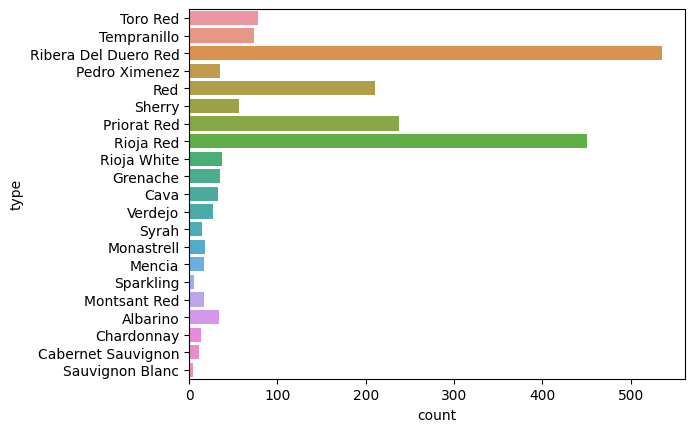

In [37]:
sns.countplot(data = df, y = 'type');

Ribera del Duero was the type of wine for most.

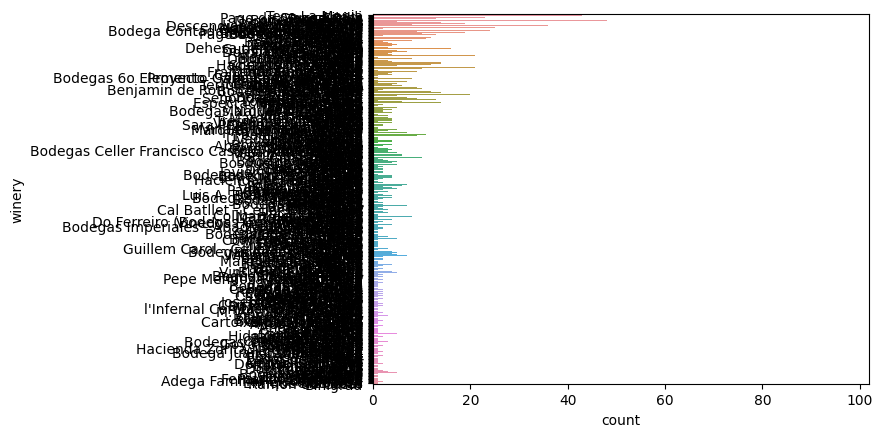

In [39]:
sns.countplot(data = df, y = 'winery');

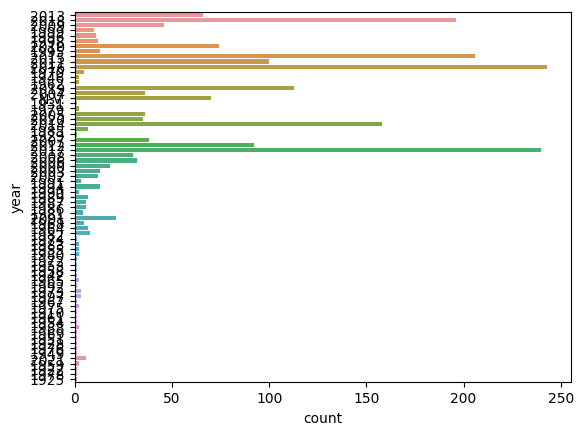

In [42]:
sns.countplot(data = df, y = 'year');

This looks this way because there is too much information to breakdown.

###**Numerical Column**

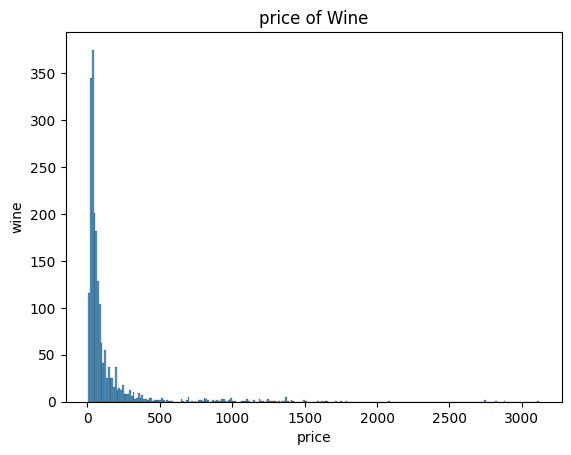

In [43]:
# Use Histogram to look at the year the wine was made
ax = sns.histplot(data = df, x ='price');
#Set the X axis label
ax.set_xlabel('price')
# Set the Y axis label
ax.set_ylabel('wine')
# Set the Title
ax.set_title('price of Wine');

This looks this way because there is too much information to breakdown.